<a href="https://colab.research.google.com/github/NeatyNut/AIFFEL_Online_Quest/blob/main/Main_Quest/CNN_main_quest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. 인공지능과 가위바위보 하기

## 개요

본 자료의 목적은 CNN을 숙달하기 위함입니다. 먼저 mnist_datasets을 활용한 손글씨 분류하기를 따라해보면서 cnn의 구조와 하이퍼파라미터 조절에 대한 이해를 넓히고자 하였습니다. 그리고 손글씨 분류 실습을 바탕으로 미니프로젝트인 가위바위보 분류기를 직접 만들 예정입니다.

이전 손글씨 분류와 달리 가위바위보 분류기는 직접 사진 데이터를 제작한 뒤, 작업하고자 합니다.

가위바위보 분류기에 사용된 데이터는 아래 링크에서 확인하실 수 있습니다.

https://drive.google.com/drive/folders/1C-t2LrYZEC-2_h1sBPY7ZFhx_UONxMVw

위 링크의 "rock_scissor_paper_5인분(1535개)"에 해당하는 폴더입니다.

# 목차

## 2-1) 손글씨 분류하기
1. 데이터 준비
2. 딥러닝 네트워크 설계
3. 딥러닝 네트워크 학습
4. 딥러닝 모델 평가
5. 딥러닝 모델 개선

## 2-2) 미니 프로젝트 : 가위바위 분류기 만들기
1. 데이터 준비
2. 딥러닝 네트워크 설계
3. 딥러닝 네트워크 학습
4. 딥러닝 모델 평가
5. 딥러닝 모델 개선

## 회고

---
## **2-1) 손글씨 분류하기**
---

---
### 1. 데이터 준비
---

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os


print(tf.__version__)   # Tensorflow의 버전을 출력 : 2.15버전

mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(len(x_train))  # x_train 배열의 크기를 출력 : 60000

2.15.0
11490434/11490434 [==============================] - 0s 0us/step
60000


- Q. 숫자 손글씨 이미지의 크기는 무엇일까요? "nxn"(n은 정수)의 형태로 나타내 보세요.

 28x28
- Q. MNIST dataset에는 총 몇 장의 손글씨 이미지가 있을까요?

 70,000

- Q. 학습용 데이터(training set)은 대략 몇명의 손글씨가 들어있을까요?

 예측 60000

    - 손글씨 이미지 개수와 크기를 확인한 모습

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


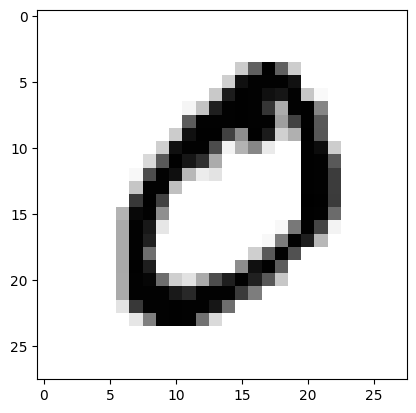

In [ ]:
# 자, 한번 불러들인 숫자 손글씨 이미지 하나를 출력해볼까요? MNIST 데이터셋의 X항목(위 코드에서는 x_train, x_test)은 이미지 데이터를 담은 행렬(matrix)입니다.
plt.imshow(x_train[1],cmap=plt.cm.binary)
plt.show()

In [ ]:
# 그렇다면 Y항목에는 어떤 값이 들어 있을까요? y_train 행렬의 2번째 값을 확인해 봅시다.
print(y_train[1])

0


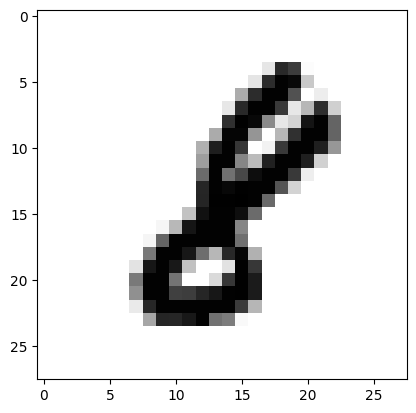

10002 번째 이미지의 숫자는 바로  8 입니다.


In [ ]:
# 그럼 이번에는 또 다른 이미지를 출력해볼까요?
index=10001
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지의 숫자는 바로 ',  y_train[index], '입니다.')

In [ ]:
# 자 그러면 우리가 불러들인 학습용 데이터는 과연 몇 장일까요? 아래 코드를 실행시켜 봅시다.
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


- Q. 언제 검증용 데이터(validation set)를 사용하나요?

 하이퍼 파라미터를 평가할 때 입니다.

- Q. 교차 검증(cross validation) 기법을 옆 친구와 서로 토론하며 이해해봅시다.

 적당한 크기로 나눈 뒤, 각각을 시험 데이터로 사용하여 평가하는 법입니다.

In [ ]:
# 숫자 손글씨 이미지의 실제 픽셀 값은 0~255 사이의 값을 가집니다. 한번 확인해 볼까요?
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))

최소값: 0  최대값: 255


In [ ]:
# 인공지능 모델을 훈련시키고 사용할 때, 일반적으로 입력은 0~1 사이의 값으로 정규화 시켜주는 것이 좋습니다. MNIST 데이터는 각 픽셀의 값이 0~255 사이 범위에 있으므로 데이터들을 255.0 으로 나누어주면 됩니다. 최소값이 0, 최대값이 1에 근접하도록 나오는지 확인해 봅시다.
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

최소값: 0.0  최대값: 1.0


---
### 2. 딥러닝 네트워크 설계
---

In [ ]:
# Sequential Model을 사용
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


- Q. 입력 이미지의 형태 input_shape=(28, 28, 1) 코드가 의미하는 바는 무엇일까요?

 28x28 사이즈의 채널 1개의 이미지

In [ ]:
# 모델 과정 요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 32)                2

---
### 3. 딥러닝 네트워크 학습
---

In [ ]:
print(f"Before Reshape - x_train_norm shape: {x_train_norm.shape}")
print(f"Before Reshape - x_test_norm shape: {x_test_norm.shape}")

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print(f"After Reshape - x_train_reshaped shape: {x_train_reshaped.shape}")
print(f"After Reshape - x_test_reshaped shape: {x_test_reshaped.shape}")

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


In [ ]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 3ms/step - loss: 0.1932 - accuracy: 0.9427
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0689 - accuracy: 0.9782
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0508 - accuracy: 0.9842
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0389 - accuracy: 0.9878
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0309 - accuracy: 0.9907
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0259 - accuracy: 0.9915
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0207 - accuracy: 0.9936
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0182 - accuracy: 0.9941
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0144 - accuracy: 0.9950
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.01

---
### 4. 딥러닝 모델 평가
---

- 테스트 데이터로 성능을 확인해 보자

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

313/313 - 1s - loss: 0.0336 - accuracy: 0.9901 - 846ms/epoch - 3ms/step
test_loss: 0.03356703743338585
test_accuracy: 0.9901000261306763


- 어떤 데이터를 잘못 추론했을까? 눈으로 확인해 보자

In [ ]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값.
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자.
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

313/313 [==============================] - 1s 2ms/step
model.predict() 결과 :  [8.0513070e-14 5.3606456e-11 1.2492018e-08 3.9021964e-07 6.5915407e-12
 6.6477314e-14 8.5308632e-17 9.9999952e-01 6.2288952e-10 1.3240899e-07]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


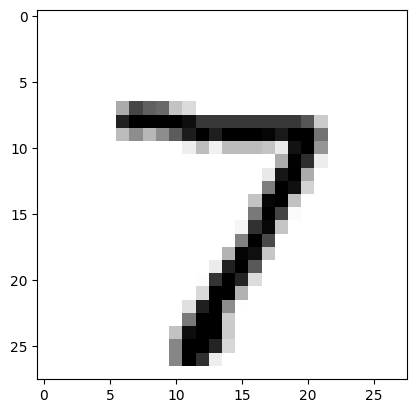

In [ ]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [3.2910566e-07 1.4915613e-02 3.1609511e-07 1.4936769e-03 3.6775071e-02
 6.3855014e-06 1.5564425e-05 3.6193863e-01 2.9448915e-01 2.9036528e-01]
라벨: 9, 예측결과: 7


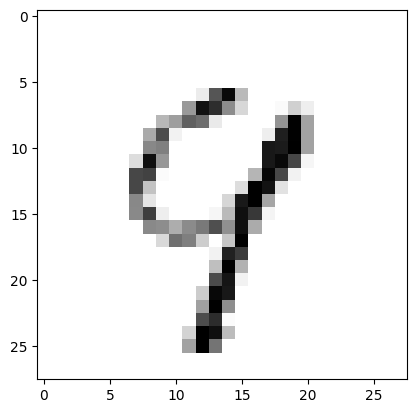

예측확률분포: [2.2929595e-15 1.5209518e-11 2.2891903e-02 2.4930766e-06 8.9252509e-19
 4.5290388e-18 4.1522646e-16 9.7710502e-01 5.4968336e-07 3.3119554e-14]
라벨: 2, 예측결과: 7


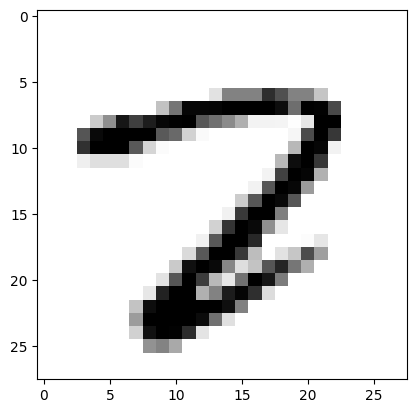

예측확률분포: [4.5444867e-08 1.7882448e-06 2.5435907e-07 5.2240019e-04 8.6098012e-12
 5.4677363e-02 7.0194318e-14 9.4479746e-01 3.6771600e-10 6.2055756e-07]
라벨: 5, 예측결과: 7


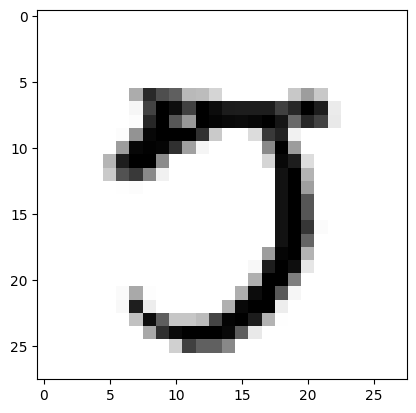

예측확률분포: [1.1542970e-11 4.7618759e-08 8.2854045e-12 8.3037696e-05 3.5716850e-02
 2.4272947e-06 2.9203842e-09 1.4692438e-08 2.2193319e-06 9.6419543e-01]
라벨: 4, 예측결과: 9


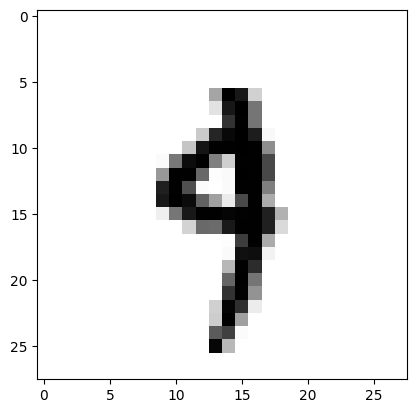

예측확률분포: [4.0989775e-08 1.8065250e-05 1.3957525e-06 2.4501085e-01 2.3174567e-05
 6.9071519e-01 3.6908904e-08 2.8392466e-04 4.2633161e-02 2.1314181e-02]
라벨: 9, 예측결과: 5


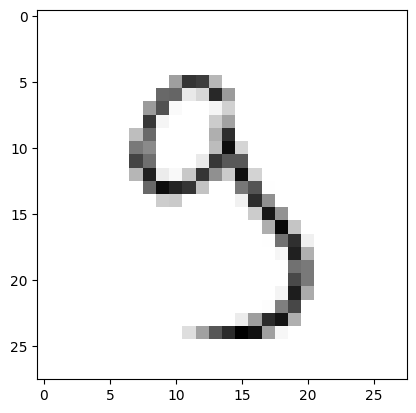

In [ ]:
# model이 추론해 낸 숫자와 실제 라벨의 값이 다른 경우는 어떤 경우인지 직접 확인

import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다.
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

---
### 5. 딥러닝 모델 개선
---

- 최적의 하이퍼파라미터 찾기

In [ ]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=[16, 32, 64]
n_channel_2=[16, 32, 64]
n_dense=[16, 32, 64]
n_train_epoch=[10, 20]

import random

n1 = random.randint(0, 2)
n2 = random.randint(0, 2)
n3 = random.randint(0, 2)
n4 = random.randint(0, 1)

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1[n1], (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2[n2], (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense[n3], activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch[n4])

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print(f"n_channel_1 : {n_channel_1[n1]}, n_channel_2 : {n_channel_1[n2]}, n_dense : {n_dense[n3]}, n_train_epoch : {n_train_epoch[n4]}")
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 32)               

---
- n_channel_1 : 64, n_channel_2 : 16, n_dense : 32, n_train_epoch : 10

 test_loss: <u>*0.04583282023668289*</u>, test_accuracy: <u>*0.9878000020980835*</u>
---
 - n_channel_1 : 32, n_channel_2 : 16, n_dense : 64, n_train_epoch : 20

 test_loss: <u>*0.051717083901166916*</u>, test_accuracy: <u>*0.9890999794006348*</u>
---
 - <u>**n_channel_1 : 16, n_channel_2 : 32, n_dense : 64, n_train_epoch : 10**</u>

 test_loss: <u>*0.03654148057103157*</u>, test_accuracy: <u>*0.9919999837875366*</u>
---
 - n_channel_1 : 16, n_channel_2 : 32, n_dense : 16, n_train_epoch : 20

 test_loss: <u>*0.049409154802560806*</u>, test_accuracy: <u>*0.9894000291824341*</u>
 ---

---
## **2-2) 미니 프로젝트 : 가위바위 분류기 만들기**
---

---
### 1. 데이터 준비
---

In [ ]:
# 라이브러리 버전 확인
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.15.0
1.23.5


- 사진파일 업로드

In [ ]:
import zipfile

# with zipfile.ZipFile('paper.zip', 'r') as zip_ref:
#     zip_ref.extractall('/content/sample_data/rock_scissor_paper/paper')

# with zipfile.ZipFile('rock.zip', 'r') as zip_ref:
#     zip_ref.extractall('/content/sample_data/rock_scissor_paper/rock')

# with zipfile.ZipFile('scissor.zip', 'r') as zip_ref:
#     zip_ref.extractall('/content/sample_data/rock_scissor_paper/scissor')

# 사용의 편의를 위해 사전에 28x28로 수정
with zipfile.ZipFile('sample_data/rock_scissor_paper.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/sample_data/rock_scissor_paper')

In [ ]:
## 실수로 압축 시 삭제
# import os
# for i in os.listdir('/content/sample_data'):
#   if ".jpg" in i:
#     os.remove('/content/sample_data/' + i)

In [ ]:
paper_path = '/content/sample_data/rock_scissor_paper/rock_scissor_paper/paper'
rock_path = '/content/sample_data/rock_scissor_paper/rock_scissor_paper/rock'
scissor_path = '/content/sample_data/rock_scissor_paper/rock_scissor_paper/scissor'

- 이미지 크기 확인

 reference : https://colab.research.google.com/drive/1l227_f3HJ4yGu_DtAkVfrGQZs1UOhQHv?usp=sharing#scrollTo=AYcE5vkJXxRp

In [ ]:
import os
os.listdir(paper_path)[0]
image_path = os.path.join(paper_path, os.listdir(paper_path)[0])

from PIL import Image
import numpy as np

pil_img = Image.open(image_path)
im = np.array(pil_img)
im.shape

(224, 224, 3)

- Q. 다운로드 받은 이미지는 크기는 무엇일까요? "nxn"(n은 정수)의 형태로 나타내 보세요.

 224x224

- 이제 가위 이미지를 불러와서 28x28 사이즈로 변경할 겁니다. 아래 코드를 실행해보세요. 이미지의 크기가 28x28 로 바뀌었나요?

In [ ]:
from PIL import Image
import glob
import os

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")

	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")

	print(len(images), " images resized.")

In [ ]:
image_dir_path = scissor_path
resize_images(image_dir_path)
print("가위 이미지 resize 완료!")

image_dir_path = rock_path
resize_images(image_dir_path)
print("바위 이미지 resize 완료!")

image_dir_path = paper_path
resize_images(image_dir_path)
print("보 이미지 resize 완료!")

103  images to be resized.
103  images resized.
가위 이미지 resize 완료!
100  images to be resized.


<ipython-input-23-924b3cd6b916>:14: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  new_img=old_img.resize(target_size,Image.ANTIALIAS)


100  images resized.
바위 이미지 resize 완료!
101  images to be resized.
101  images resized.
보 이미지 resize 완료!


---
- 편의상 로컬에서 그림 취합 및 resize를 해온 상태라 일부코드는 실질적으론 제외합니다.

- (로컬에서 아래 코드를 이용해 5명 제작분(김민기/최강훈/조수민/홍채림/김승순)을 취합하고 resize함)
---

In [ ]:
import os
import glob
from PIL import Image
import shutil
import itertools

main_path = "C:/Users/uilov/Downloads/새 폴더/other"  # 자기에 맞게 변경할 주소

try :
    os.mkdir(main_path + '/rock_scissor_paper_result')
    os.mkdir(main_path + '/rock_scissor_paper_result/paper')
    os.mkdir(main_path + '/rock_scissor_paper_result/rock')
    os.mkdir(main_path + '/rock_scissor_paper_result/scissor')
except :
    pass

paper_path = main_path + '/rock_scissor_paper_result/paper'
rock_path = main_path + '/rock_scissor_paper_result/rock'
scissor_path = main_path + '/rock_scissor_paper_result/scissor'

paper_list = []
rock_list = []
scissor_list = []

# 폴더 내부 탐색 후 jpg리스트 뽑기
# zip경우의 수는 솔직히 시간이 짧아서 안함.ㅜ 그것 정도 직접 압축 풀자!
def jpg_finder(path):
    if glob.glob(path+"/*.jpg"):
        return glob.glob(path+"/*.jpg")
    else :
        for item in os.listdir(path):
            sub_folder = os.path.join(path, item)
            if os.path.isdir(sub_folder):
                # 재귀함수 : 서브폴더 탐색
                return jpg_finder(sub_folder)

# 폴더별로 담기
for i in os.listdir(main_path):
    if 'rock_scossor_paper_result' == i:
        pass
    elif 'paper' in i:
        paper_list.append(jpg_finder(main_path + '/' + i))
    elif 'rock' in i :
        rock_list.append(jpg_finder(main_path + '/' + i))
    elif 'scissor' in i:
        scissor_list.append(jpg_finder(main_path + '/' + i))

paper_num = 0
rock_num = 0
scissor_num = 0

# 1차원 리스트화
paper_list = list(itertools.chain(*paper_list))
rock_list = list(itertools.chain(*rock_list))
scissor_list = list(itertools.chain(*scissor_list))

# 그림 사이즈 조절
while paper_list:
    paper_part = paper_list.pop()
    shutil.copy(paper_part, paper_path + '/' + str(paper_num) + '.jpg')
    paper_num += 1

while rock_list:
    rock_part = rock_list.pop()
    shutil.copy(rock_part, rock_path + '/' + str(rock_num) + '.jpg')
    rock_num += 1

while scissor_list:
    scissor_part = scissor_list.pop()
    shutil.copy(scissor_part, scissor_path + '/' + str(scissor_num) + '.jpg')
    scissor_num += 1

# 그림 사이즈 조절
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")

	print(len(images), " images to be resized.")

	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.AFFINE) ## ANTIALIAS
		new_img.save(img, "JPEG")

	print(len(images), " images resized.")

# 그림 사이즈 조절
resize_images(paper_path)
resize_images(rock_path)
resize_images(scissor_path)

In [ ]:
import numpy as np
import glob
from PIL import Image

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1

    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1

    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = '/content/sample_data/rock_scissor_paper/rock_scissor_paper'
(x_train, y_train)=load_data(image_dir_path, 1535)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 1535 입니다.
x_train shape: (1535, 28, 28, 3)
y_train shape: (1535,)


- test데이터 및 검증 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train_norm, y_train, test_size=0.3, random_state=1)

In [ ]:
n_channel_1=[16, 32, 64]
n_channel_2=[16, 32, 64]
n_dense=[16, 32, 64]
n_train_epoch=[10, 20]

import random

n1 = random.randint(0, 2)
n2 = random.randint(0, 2)
n3 = random.randint(0, 2)
n4 = random.randint(0, 1)

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1[n1], (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2[n2], (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense[n3], activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, epochs=n_train_epoch[n4])

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"n_channel_1 : {n_channel_1[n1]}, n_channel_2 : {n_channel_1[n2]}, n_dense : {n_dense[n3]}, n_train_epoch : {n_train_epoch[n4]}")
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 64)        1792      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 1600)              0         
                                                                 
 dense_8 (Dense)             (None, 32)               

---
- n_channel_1 : 16, n_channel_2 : 64, n_dense : 16, n_train_epoch : 20

 test_loss: <u>*0.11732624471187592*</u>, test_accuracy: <u>*0.9457700848579407*</u>
---
- n_channel_1 : 16, n_channel_2 : 32, n_dense : 32, n_train_epoch : 10

 test_loss: <u>*0.3113362193107605*</u>, test_accuracy: <u>*0.8633405566215515*</u>

---
- n_channel_1 : 16, n_channel_2 : 16, n_dense : 16, n_train_epoch : 20

 <u>*test_loss: 0.19668112695217133*</u>, <u>*test_accuracy: 0.924078106880188*</u>

---
- **n_channel_1 : 64, n_channel_2 : 64, n_dense : 32, n_train_epoch : 20**

 <u>*test_loss: 0.07877163589000702*<u>, test_accuracy: <u>*0.9761388301849365*<u>
---

- 하이퍼파라미터가 **n_channel_1 : 64, n_channel_2 : 64, n_dense : 32, n_train_epoch : 20**
인 경우

 <u>*정확도가 97.6%*</u>로 결과가 가장 좋았다고 판단됩니다.

## 번외

- 김민기/최강훈/조수민/홍채림/김승순님 데이터(1535개) 학습 후,
- 이선재님 데이터(755개) 정확도 분석

In [ ]:
# 압축풀기
with zipfile.ZipFile('sample_data/SeonJae_test.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/sample_data/SeonJae_test')

In [ ]:
image_dir_path = '/content/sample_data/rock_scissor_paper/rock_scissor_paper'
(x_train, y_train)=load_data(image_dir_path, 1535)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 1535 입니다.
x_train shape: (1535, 28, 28, 3)
y_train shape: (1535,)


In [ ]:
image_dir_path = '/content/sample_data/SeonJae_test'
(x_test, y_test)=load_data(image_dir_path, 755)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 755 입니다.
x_test shape: (755, 28, 28, 3)
y_test shape: (755,)


In [ ]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(128, (2,2), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (4,4), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# 모델 훈련
model.optimizer.learning_rate = 0.01
model.fit(x_train_norm, y_train, epochs=20)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_81 (Conv2D)          (None, 27, 27, 128)       1664      
                                                                 
 max_pooling2d_79 (MaxPooli  (None, 13, 13, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_82 (Conv2D)          (None, 10, 10, 64)        131136    
                                                                 
 max_pooling2d_80 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_36 (Flatten)        (None, 1600)              0         
                                                                 
 dense_88 (Dense)            (None, 32)              

---
1. 선재님꺼 학습률 및 드롭아웃으로 오버피팅 제한 안할 시

 test_loss: 10.423787117004395, test_accuracy: 0.3430463671684265

---
2. 드롭아웃x 학습률 : 0.01

 test_loss: 11.653243064880371, test_accuracy: 0.40264901518821716
---
3. 드롭아웃x 학습률 : 0.005

 test_loss: 13.568696022033691, test_accuracy: 0.33774834871292114
---
4. 드롭아웃0.5, 학습률 : 0.01

 test_loss: 1.7258131504058838, test_accuracy: 0.5178807973861694

---

5. 신경망 조정

 test_loss: 7.966012954711914, test_accuracy: 0.41721853613853455

---

## 회고

### Keep
혼자의 데이터로는 부족하다고 생각하여 5명분의 데이터를 취합하여 학습하는 방향으로 실시하였다

### Problem
처음에는 다 업로드한 뒤 28x28사이즈로 줄이고자 하였으나, 제 인터넷이 너무 느린 관계로 로컬에서 5개를 취합하고, 사이즈를 줄이는 작업을 하고자 하였다.

선재님꺼에 대한 예측도가 굉장히 떨어지는 편.. 오버피팅 제한하는 것들을 넣으면 나아지지만 이 상황에선 사실상 선재님꺼도 학습하는 것이 더 좋은 모델이라고 깨달을 수 있었다.

### Try
로컬에서는 사이즈 변경 시 위의 코드처럼 ANTIALIAS이 아닌 AFFINE을 넣어야만 되어서 시간을 너무 많이 소진하였다.